In [56]:
import cv2
import matplotlib.pyplot as plt
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
%matplotlib inline

In [57]:
model_id = "IDEA-Research/grounding-dino-tiny"
device = "cuda"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

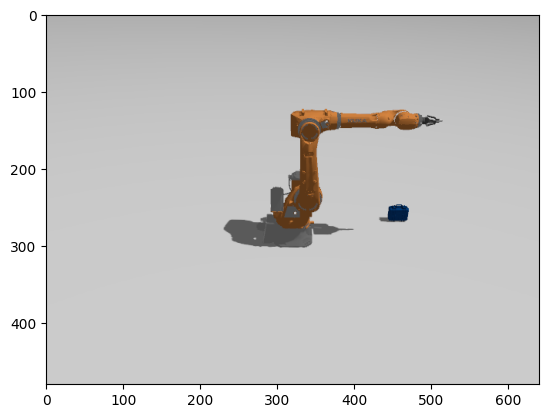

In [63]:
file_path = "/workspaces/PnP_Pl/colcon_ws/src/LLM_Control/llm_image_analyser/llm_image_analyser/kuka_feed.png"
text_labels = [["robot end-effector", "a brief case"]]

img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = Image.open(file_path)
plt.imshow(img)

In [64]:
inputs = processor(images=img, text=text_labels, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    # target_sizes=[img.size[::-1]]
    target_sizes=[img.shape[:2]]
)

/tmp/ipykernel_700/419209695.py:5: FutureWarning: `box_threshold` is deprecated and will be removed in version 4.51.0 for `GroundingDinoProcessor.post_process_grounded_object_detection`. Use `threshold` instead.
  results = processor.post_process_grounded_object_detection(


In [65]:
result = results[0]
for box, score, labels in zip(result["boxes"], result["scores"], result["labels"]):
    box = [round(x, 2) for x in box.tolist()]
    print(f"Detected {labels} with confidence {round(score.item(), 3)} at location {box}")

Detected a brief case with confidence 0.688 at location [442.13, 244.87, 471.99, 270.21]
Detected robot end - effector with confidence 0.729 at location [229.47, 119.64, 516.0, 304.7]


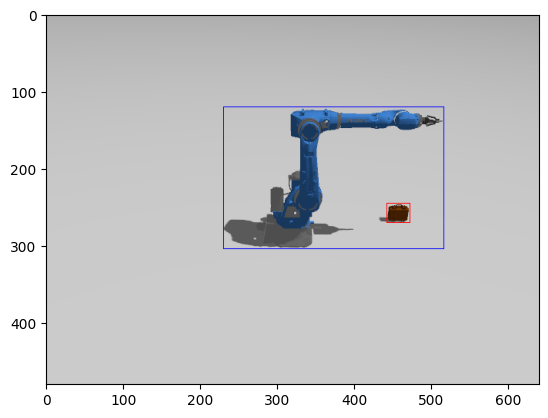

In [67]:
img = cv2.imread(file_path)
rob_box = cv2.rectangle(img, (230, 120), (516, 304), (0, 0, 255), 1)
pkg_box = cv2.rectangle(rob_box, (442, 245), (472, 270), (255, 0, 0), 1)
plt.imshow(pkg_box)